In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
%matplotlib inline

### Question (1) (iii)

In [2]:
def trajectory(t):
    return np.exp((-3/2) * t) * ( np.cos( (np.sqrt(3)/2) * t)   + ((np.sqrt(3)/2) * np.cos( (np.sqrt(3)/2) * t)) )

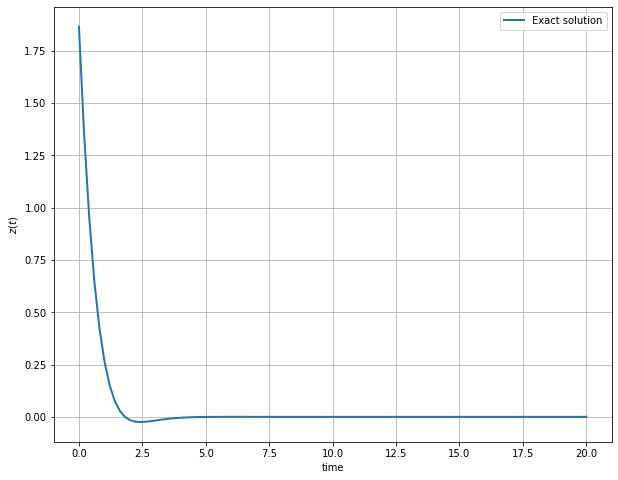

In [3]:
t =  np.linspace(0,20,100)
plt.figure(figsize=(10,8))
plt.plot(t,trajectory(t),linewidth=2)
plt.xlabel("time")
plt.ylabel(rf"$z(t)$")
plt.legend(["Exact solution"])
plt.grid()
plt.show()

### Question (4)  (a) (i) Under-damped

$
\begin{align}
\ddot{x}  = -x - \beta \dot{x} \qquad \textbf{Under-damped system where } 0 < \beta < 2
\end{align}
$


In [13]:
def acceleration(x,beta,v):
    return -x - (beta * v)

def verlet(c,d,dt,x_0,v_0,a,beta):
    t =  np.arange(c,d+dt,dt)
    x  =  np.zeros(len(t))
    v =  np.zeros(len(x))
    x[0],v[0] = 1,1
    for n in range(len(x) -1):
        a_n = a(x[n], beta, v[n])
        x[n+1] = x[n] + (dt * v[n]) + 0.5* (dt**2 * a_n)
        v_hat =  v[n] + (0.5 * dt) *( a_n + a( x[n+1],beta,v[n] + (dt*a_n)))
        v[n+1] = v[n] + (0.5*dt) * (a_n + a(x[n+1], beta, v_hat))
    return t,x,v

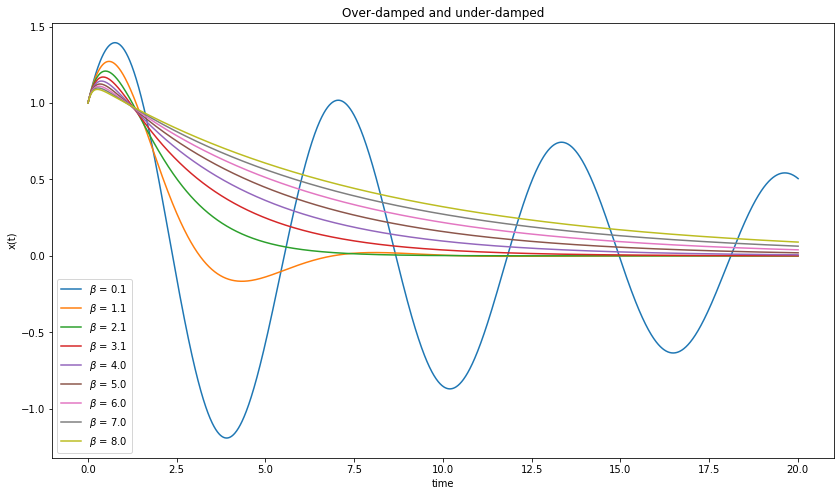

In [14]:
c,d,x_0,v_0 = 0 ,20,0,0
beta = 0.4
delta_t = 0.01
betas =  np.linspace(0.1,8,9)
f  = plt.figure(figsize=(14,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(t,x,label=rf'$\beta$ = {round(beta,1)}')
plt.xlabel("time")
plt.ylabel(rf"x(t)")
plt.legend()
plt.title("Over-damped and under-damped")
plt.show()


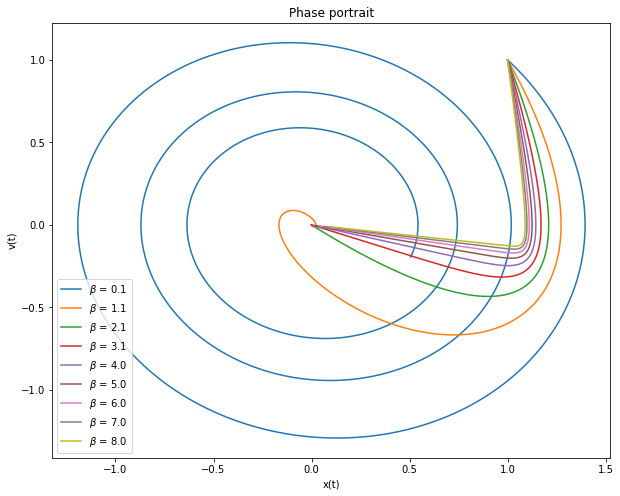

In [15]:
fig = plt.figure(figsize=(10,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(x,v,label=rf'$\beta$ = {round(beta,1)}')
plt.xlabel(rf"x(t)")
plt.ylabel(rf"v(t)")
plt.title("Phase portrait")
plt.legend()
plt.show()

### Question (4)  (b)

$
\begin{align}
a_n  = -x  + \beta \sin\left( v \right) 
\end{align}
$


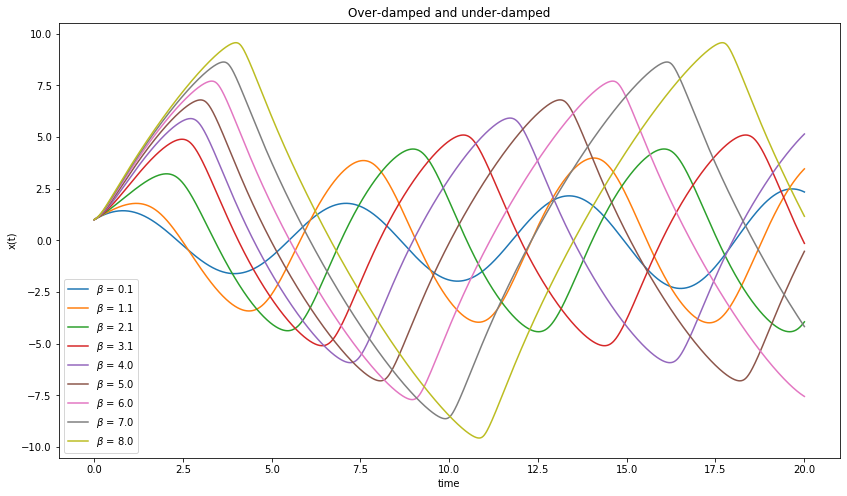

In [16]:
def acceleration(x,beta,v):
    return -x + beta* np.sin(v)

c,d,x_0,v_0 = 0 ,20,1,0
delta_t = 0.01
betas =  np.linspace(0.1,8,9)
f = plt.figure(figsize=(14,8))
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(t,x,label=rf'$\beta$ = {round(beta,1)}')

plt.xlabel("time")
plt.ylabel(rf"x(t)")
plt.title("Over-damped and under-damped")
plt.legend()
plt.show()

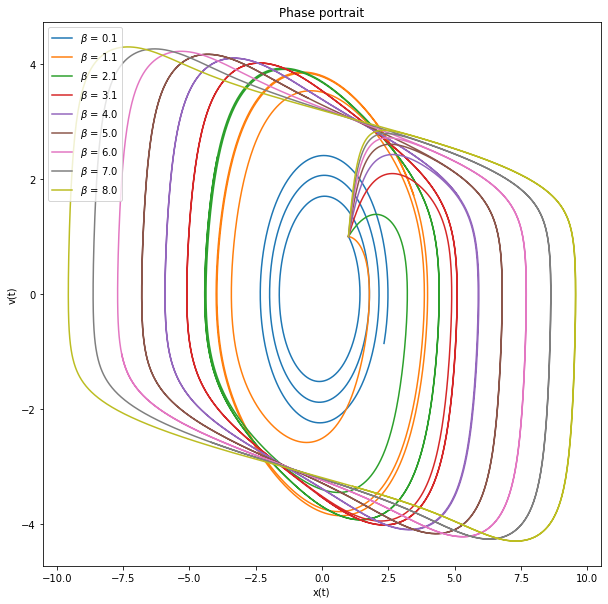

In [17]:
fig = plt.figure(figsize=(10,10))
flag=1
for beta in betas:
    t,x,v = verlet(c,d,delta_t,x_0,v_0,acceleration,beta)
    plt.plot(x,v,label=rf'$\beta$ = {round(beta,1)}')

plt.xlabel(rf"x(t)")
plt.ylabel(rf"v(t)")
plt.legend()
plt.title("Phase portrait")
plt.show()